# k Nearest Neighbors
## Classification
Реализуйте алгоритм к ближайших соседей. 
Создадим искуственный набор данных из 100 наблюдений с 3 классами.
Необходимо реализовать функцию на входе которой:
- тренировочный набор данных (признаки и метки классов);
- тестовый набор данных (признаки);
- $k$ - количество ближайших соседей.

На выходе функция должна возвращать метки тестового набора данных. 
В качестве расстояния между объектами следует использовать Эвклидову меру.

**Алгоритм к ближайших соседей:**

Для каждого объекта тестового набора данных:
1. вычисление расстояний между всеми объектами тренировочного набора;
2. определение $k$ наименьших расстояний;
3. определение классов для $k$ найденных объектов;
4. присваивание метки тестовому объекту класса, который превалирует среди найденных объектов.

В многоклассовой модели может возникнуть неопределенность, что в 3 найденных объектак будут присутсвовать разные классы. В этом случае необходимо присваивать класс случайным образом.

In [650]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_blobs
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
import random
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
%matplotlib inline

In [651]:
X, Y = make_blobs(n_samples = 100, n_features=2, centers=3, cluster_std = 2, random_state=17)

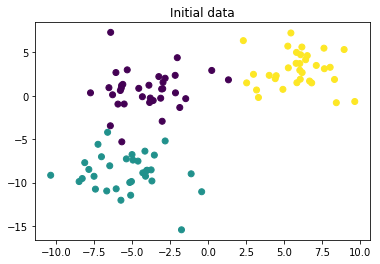

In [652]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Initial data')

Определение $k$ объектов с наименьшими расстояниями

In [653]:
def get_k_min_distances(x_test_record, x_train, k):
    
    distances = list()
    
    for i in range(len(x_train)):        
        
        dst = distance.euclidean(x_test_record, x_train[i])
        
        distances.append([i,dst])  
        
    distances = sorted(distances,key=lambda x: x[1])         
    
    return distances[:k]

Определение превалирующего класса среди $k$ найденных объектов

In [654]:
def get_most_popular_class(k_min_distances,y_train):
    
    k_classes = list()
    
    indexes = list(map(list, zip(*k_min_distances)))[0]
    
    for i in range(len(y_train)):    
        
        if i in indexes:
        
            k_classes.append(y_train[i])     
            
    if len(set(k_classes)) != len(k_classes):
        
        most_popular_class = max(set(k_classes), key=k_classes.count)
    
    else:
        
        most_popular_class =  random.choice(k_classes)       
                
    return most_popular_class

Предсказание класса для объекта из тестовой выборки

In [655]:
def get_predicted_class(x_train,y_train,x_test_record,k):
    
    return get_most_popular_class(get_k_min_distances(x_test_record,x_train,k),y_train)                

Предсказание классов для объектов из тестовой выборки

In [656]:
def funct_kNN(x_train, y_train, x_test, k):
    
    y_test = list()
    
    correct_prediction = 0
    
    for x_test_record in x_test:                   
        
        predicted_class = get_predicted_class(x_train,y_train,x_test_record,k)
        
        y_test.append(predicted_class)
            
    return np.array(y_test)

Определение точности по предсказанным и истинным значениям тестовой выборки

In [657]:
def get_accuracy(y_pred,y_true):
    
    score = y_true == y_pred

    return np.average(score)

Для корректного анализа построенного классификатора, разбейте исходный набор данных на тренировочный и тестовый.
Проверьте качество классификации для различных параметров $k$ (1, 3, 5, 7, 9) метрикой точность (Accuracy). Точность это отношение количества правильно классифицированных объектов ко всему количеству объектов.

In [658]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

y_test_k_1 = funct_kNN(X_train,y_train,X_test,1)
y_test_k_3 = funct_kNN(X_train,y_train,X_test,3)
y_test_k_5 = funct_kNN(X_train,y_train,X_test,5)
y_test_k_7 = funct_kNN(X_train,y_train,X_test,7)
y_test_k_9 = funct_kNN(X_train,y_train,X_test,9)

In [659]:
accuracy_k_1 = get_accuracy(y_test_k_1,y_test)
accuracy_k_3 = get_accuracy(y_test_k_3,y_test)
accuracy_k_5 = get_accuracy(y_test_k_5,y_test)
accuracy_k_7 = get_accuracy(y_test_k_7,y_test)
accuracy_k_9 = get_accuracy(y_test_k_9,y_test)

In [660]:
accuracy_k_1,accuracy_k_3,accuracy_k_5,accuracy_k_7,accuracy_k_9

(0.96666666666666667, 0.96666666666666667, 1.0, 1.0, 1.0)

Постройте разделающие поверхности, которые строит классификатор

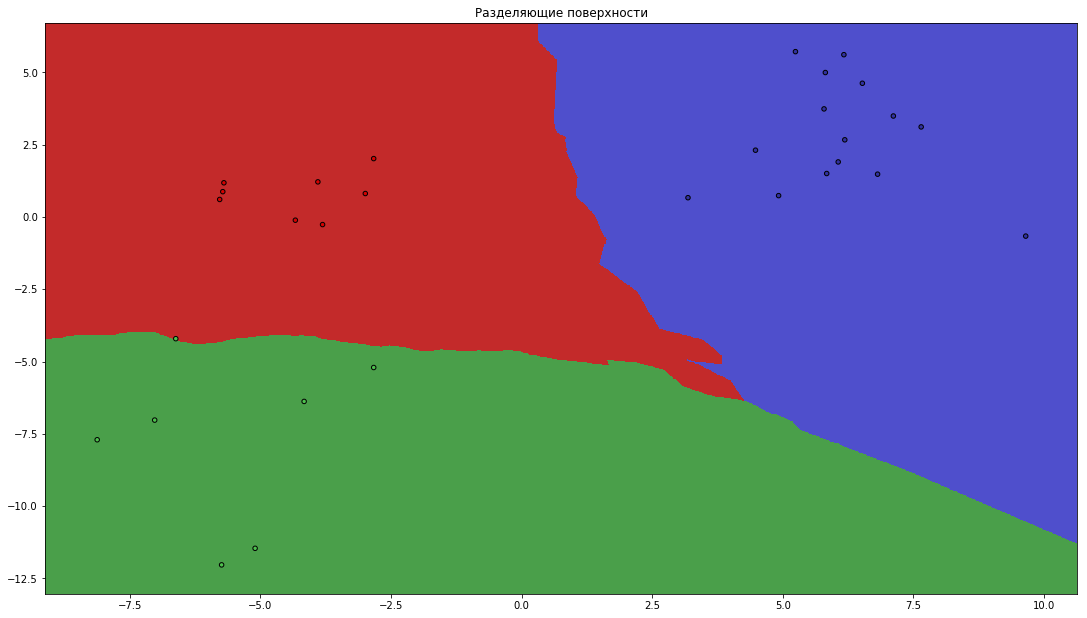

In [608]:
h = .02  

cmap_light = ListedColormap(['#C32A2A', '#4a9f4a', '#4f4fcc'])
cmap_bold = ListedColormap(['#D80000', '#4DC14D', '#3131A1'])         
    
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))             

Z = funct_kNN(X_train,y_train,np.c_[xx.ravel(), yy.ravel()],9)
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold,edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Разделяющие поверхности") 
plt.gcf().set_size_inches(18.5, 10.5)

## Regression
Напишите функцию для регрессии методом к ближайших соседей.

Для проверки вашего регрессионной модели создайте функцию синуса в диапазоне [0, 5] и возьмите в этом диапазоне 10 случайных точек как тренеровочную выборку. 
Задача: предсказать функцию на всем диапазоне [0, 5] для всех возможных значений параметра $k$.

$y = sin(x)$

**Алгоритм регрессии:**

Для каждого тестового обекта:
1. вычисление расстояний между всеми тренировочными объектами (можно использовать просто разницу по модулю между признаками объектов, так как у нас всего один признак в задаче);
2. нахождение $k$ объектов с минимальными расстояниями;
3. вычисление среднего значения по к найденным объектам и присваивание этого значения тестовому объекту.

Получаем среднее значение $k$ объектов с минимальными расстояниями

In [611]:
def get_avg_value(k_min_distances,y_train):
    
    k_values = list()
    
    indexes = np.array(list(map(list, zip(*k_min_distances)))[0])
    
    for i in range(len(y_train)):    
        
        if i in indexes:
        
            k_values.append(y_train[i])                         
                
    return np.average(k_values)

Поулчаем предсказанное значение для объекта из тестовой выборки

In [612]:
def get_predicted_value(x_train,y_train,x_test_record,k):
    
    return get_avg_value(get_k_min_distances(x_test_record,x_train,k),y_train)    

Регрессия для тестовой выборки

In [613]:
def funct_kNN_regressor(x_train, y_train, x_test, k):
    
    y_test = list()
    
    correct_prediction = 0
    
    for x_test_record in x_test:                   
        
        predicted_value = get_predicted_value(x_train,y_train,x_test_record,k)
        
        y_test.append(predicted_value)
            
    return np.array(y_test)

Создание функции синуса в диапазоне [0, 5]

In [661]:
fs = 5
f = 5
x_regression = np.arange(fs*1000)/1000 
y_regression = [ np.sin(2*np.pi*f * (i/fs)) for i in x]

Берем 10 случайных точек, создаем тестовую выборку:

In [662]:
x_regression_train = np.empty((0, 1))
y_regression_train = np.empty((0, 1))

for i in np.random.randint(5000, size=10):
    x_regression_train = np.append(x_regression_train, [x[i]])
    y_regression_train = np.append(y_regression_train, [y[i]])        

Постройте на одном графике исходную функцию, тренировочные объекты и предсказанные функции для каждого значения $k$.

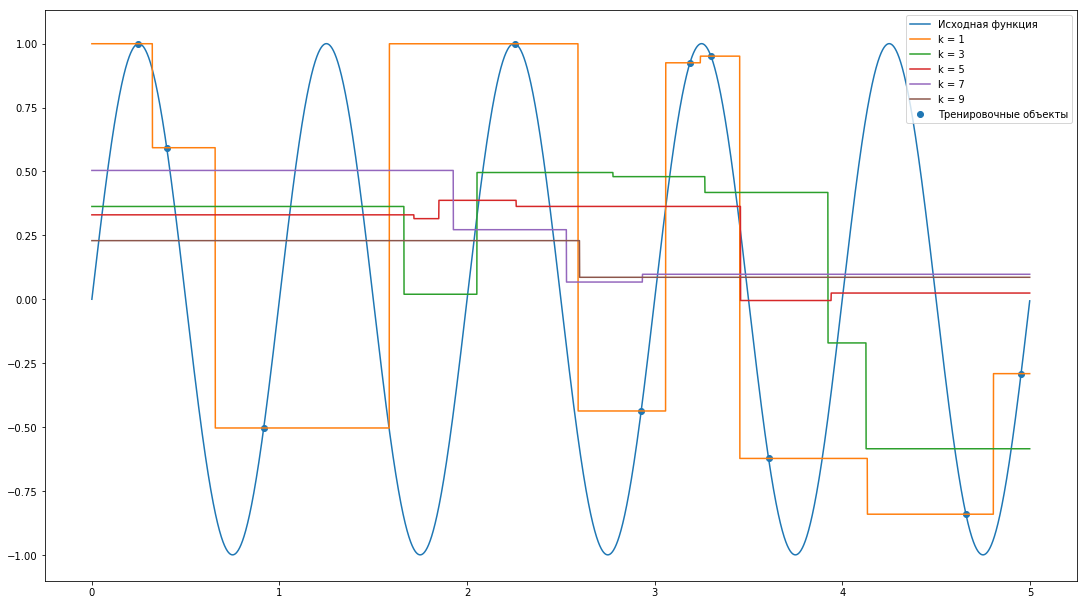

In [663]:
plt.plot(x_regression, y_regression,label = 'Исходная функция')
plt.scatter(x_regression_train, y_regression_train,label = 'Тренировочные объекты')

for k in [1,3,5,7,9]:
    plt.plot(x,funct_kNN_regressor(x_regression_train,y_regression_train,x,k), label='k = %d' % k)
    
plt.legend()
plt.gcf().set_size_inches(18.5, 10.5)

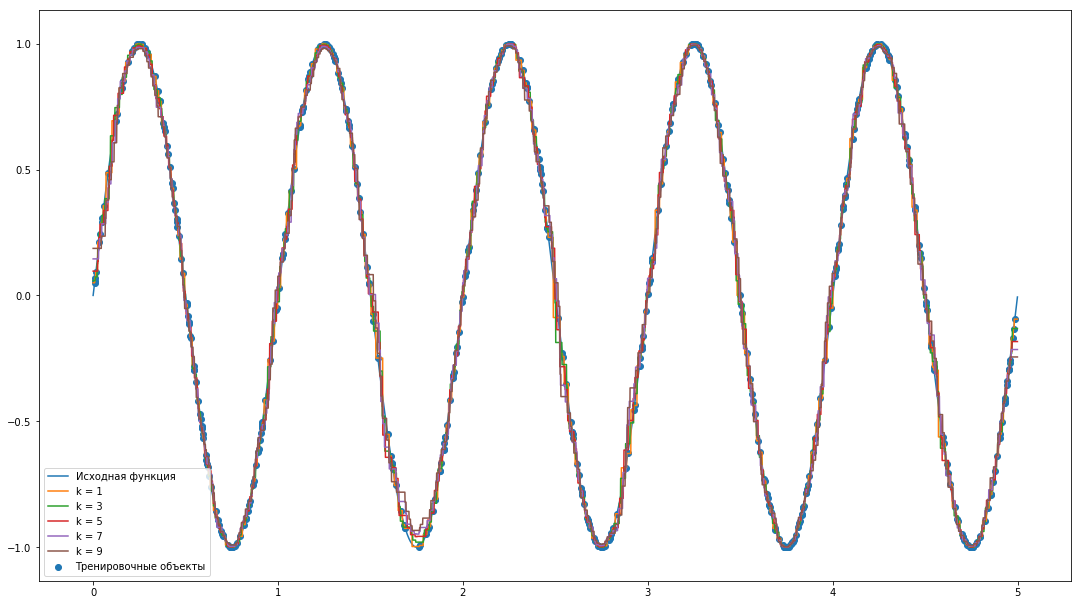

In [664]:
for i in np.random.randint(5000, size=500):
    x_regression_train = np.append(x_regression_train, [x[i]])
    y_regression_train = np.append(y_regression_train, [y[i]])    
    
plt.plot(x_regression, y_regression,label = 'Исходная функция')
plt.scatter(x_regression_train, y_regression_train,label = 'Тренировочные объекты')

for k in [1,3,5,7,9]:
    plt.plot(x,funct_kNN_regressor(x_regression_train,y_regression_train,x,k), label='k = %d' % k)
    
plt.legend()
plt.gcf().set_size_inches(18.5, 10.5)    